In [1]:
import pandas as pd
import os

In [2]:
data_loc='./data'

In [3]:
data=pd.read_csv(os.path.join(data_loc,'new_train.csv'))
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
data=data.rename(columns={'xAttack':'class'})
cat_features=['protocol_type','service','flag','class']
temp_data=data.drop(columns=cat_features)
num_features=temp_data.columns.tolist()
print(num_features)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [6]:
updated_data=data.copy()
for i in updated_data:
    if i in num_features:
        updated_data[i]=updated_data[i].astype(float)
    else:
        updated_data[i]=updated_data[i].astype('category')

updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  float64 
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  float64 
 5   dst_bytes                    125973 non-null  float64 
 6   land                         125973 non-null  float64 
 7   wrong_fragment               125973 non-null  float64 
 8   urgent                       125973 non-null  float64 
 9   hot                          125973 non-null  float64 
 10  num_failed_logins            125973 non-null  float64 
 11  logged_in                    125973 non-null  float64 
 12  num_compromised              125973 non-null

In [7]:
std_upd=updated_data.std(axis=0)
std_upd.sort_values(ascending=True,axis=0)

num_outbound_cmds              0.000000e+00
is_host_login                  2.817483e-03
land                           1.408607e-02
urgent                         1.436603e-02
num_shells                     2.218113e-02
root_shell                     3.660284e-02
su_attempted                   4.515438e-02
num_failed_logins              4.523914e-02
is_guest_login                 9.661233e-02
num_access_files               9.936956e-02
dst_host_srv_diff_host_rate    1.125638e-01
diff_srv_rate                  1.803144e-01
dst_host_diff_srv_rate         1.889218e-01
wrong_fragment                 2.535300e-01
srv_diff_host_rate             2.598305e-01
dst_host_rerror_rate           3.065575e-01
dst_host_same_src_port_rate    3.089971e-01
dst_host_srv_rerror_rate       3.194594e-01
rerror_rate                    3.204355e-01
srv_rerror_rate                3.236472e-01
same_srv_rate                  4.396229e-01
dst_host_serror_rate           4.447841e-01
dst_host_srv_serror_rate       4

In [8]:
updated_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
droplist=['urgent','num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files','dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment','num_outbound_cmds']
updated_data.drop(axis=0,columns=droplist,inplace=True)
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  float64 
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  float64 
 5   dst_bytes                    125973 non-null  float64 
 6   land                         125973 non-null  float64 
 7   hot                          125973 non-null  float64 
 8   logged_in                    125973 non-null  float64 
 9   num_compromised              125973 non-null  float64 
 10  su_attempted                 125973 non-null  float64 
 11  num_root                     125973 non-null  float64 
 12  num_file_creations           125973 non-null

In [10]:
num_features=[]
for i in updated_data:
    if updated_data[i].dtypes=='float':
        num_features.append(i)
print(num_features)

['duration', 'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


Applying Classification Technique

Base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Examples: AdaBoost, Gradient Tree Boosting.

In [11]:
from pycaret.classification import *

In [12]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  float64 
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  float64 
 5   dst_bytes                    125973 non-null  float64 
 6   land                         125973 non-null  float64 
 7   hot                          125973 non-null  float64 
 8   logged_in                    125973 non-null  float64 
 9   num_compromised              125973 non-null  float64 
 10  su_attempted                 125973 non-null  float64 
 11  num_root                     125973 non-null  float64 
 12  num_file_creations           125973 non-null

In [15]:
model_list=['lightgbm','rf','dt','ada','knn','lr','nb','svm']

In [14]:
classy=setup(data=updated_data,target='class',preprocess=True,imputation_type='iterative',use_gpu=True,n_jobs=-1,iterative_imputation_iters=20,train_size=0.85,numeric_features=num_features,numeric_imputation='mean',categorical_features=['protocol_type','service','flag'],categorical_imputation='mode',categorical_iterative_imputer='lightgbm')

,Description,Value
0,session_id,5822
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"dos: 0, normal: 1, probe: 2, r2l: 3, u2r: 4"
4,Original Data,"(125973, 32)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
top=compare_models(fold=10,cross_validation=True,round=4,include=model_list)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9987,1.0000,0.9003,0.9987,0.9986,0.9977,0.9977,9.6020
dt,Decision Tree Classifier,0.9980,0.9984,0.9060,0.9980,0.9980,0.9965,0.9965,1.8030
knn,K Neighbors Classifier,0.9912,0.9981,0.8630,0.9912,0.9912,0.9847,0.9847,28.3900
lightgbm,Light Gradient Boosting Machine,0.9813,0.9854,0.8011,0.9822,0.9816,0.9674,0.9676,6.2460
ada,Ada Boost Classifier,0.8384,0.8527,0.4881,0.8455,0.8369,0.7204,0.7256,11.5170
lr,Logistic Regression,0.8378,0.9352,0.3827,0.8175,0.8021,0.6996,0.7097,145.9330
nb,Naive Bayes,0.3861,0.8760,0.2683,0.5804,0.2609,0.0655,0.1278,0.3730
svm,SVM - Linear Kernel,0.2094,0.0000,0.1339,0.4252,0.2743,-0.0810,-0.0966,1.4470


In [17]:
rf=create_model(estimator='rf',fold=20,round=4,cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,1.0000,0.7901,0.9987,0.9989,0.9984,0.9984
1,0.9981,1.0000,0.8970,0.9981,0.9981,0.9967,0.9967
2,0.9989,1.0000,0.8896,0.9989,0.9988,0.9980,0.9980
3,0.9987,1.0000,0.8851,0.9987,0.9987,0.9977,0.9977
4,0.9981,1.0000,0.8896,0.9983,0.9982,0.9967,0.9967
5,0.9991,1.0000,0.9940,0.9991,0.9991,0.9984,0.9984
6,0.9989,1.0000,0.8993,0.9989,0.9989,0.9980,0.9980
7,0.9978,1.0000,0.8704,0.9978,0.9977,0.9961,0.9961
8,0.9983,1.0000,0.7847,0.9980,0.9981,0.9971,0.9971
9,0.9987,0.9998,0.8901,0.9987,0.9987,0.9977,0.9977


In [18]:
tuned_rf=tune_model(rf,fold=20,round=4,n_iter=20,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9983,1.0000,0.7942,0.9979,0.9981,0.9971,0.9971
1,0.9974,1.0000,0.8971,0.9974,0.9974,0.9954,0.9954
2,0.9991,0.9997,0.8900,0.9991,0.9990,0.9984,0.9984
3,0.9989,0.9999,0.9899,0.9989,0.9989,0.9980,0.9980
4,0.9979,1.0000,0.9992,0.9982,0.9980,0.9964,0.9964
5,0.9989,1.0000,0.9989,0.9989,0.9989,0.9980,0.9980
6,0.9989,1.0000,0.9995,0.9989,0.9989,0.9980,0.9980
7,0.9976,0.9999,0.8851,0.9976,0.9975,0.9958,0.9958
8,0.9987,1.0000,0.8895,0.9987,0.9987,0.9977,0.9977
9,0.9985,0.9999,0.8946,0.9985,0.9985,0.9974,0.9974


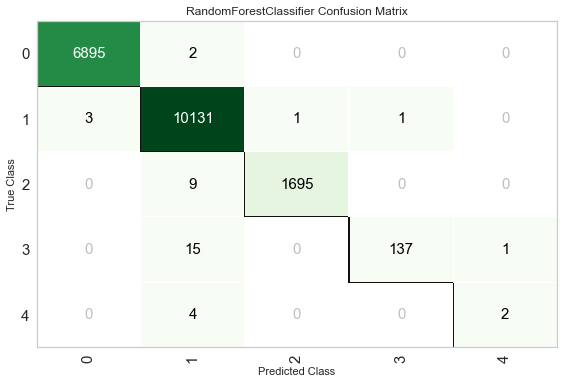

In [19]:
plot_model(rf,plot='confusion_matrix')

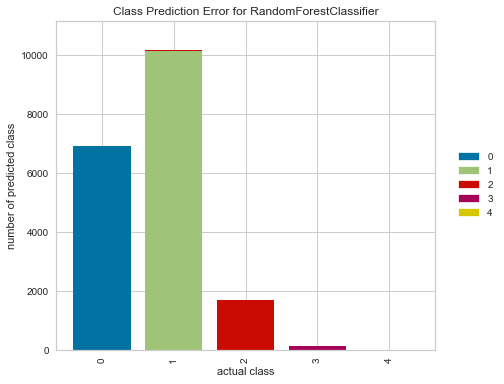

In [20]:
plot_model(rf,plot='error')

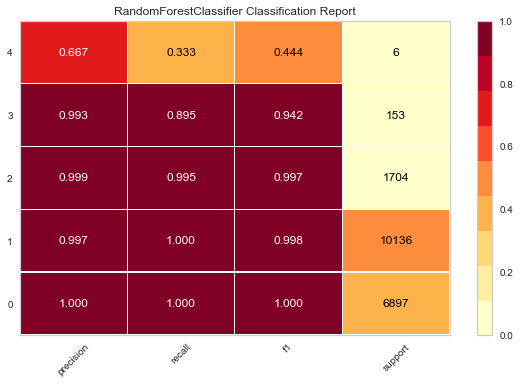

In [23]:
plot_model(rf,plot='class_report')

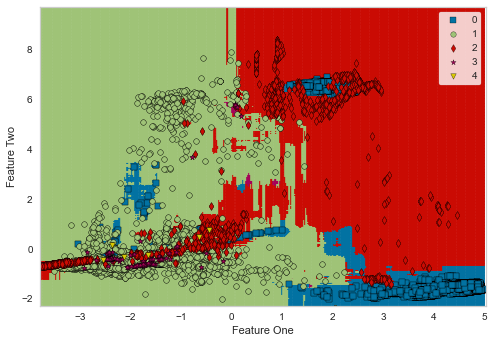

In [24]:
plot_model(rf,plot='boundary')

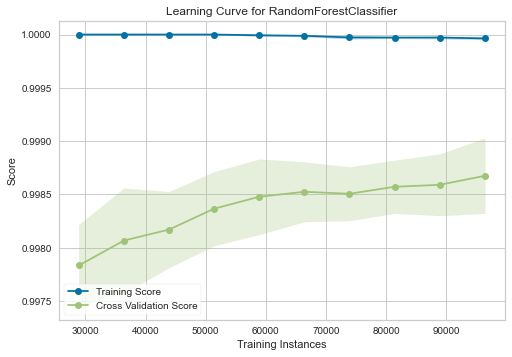

In [25]:
plot_model(rf,plot='learning')

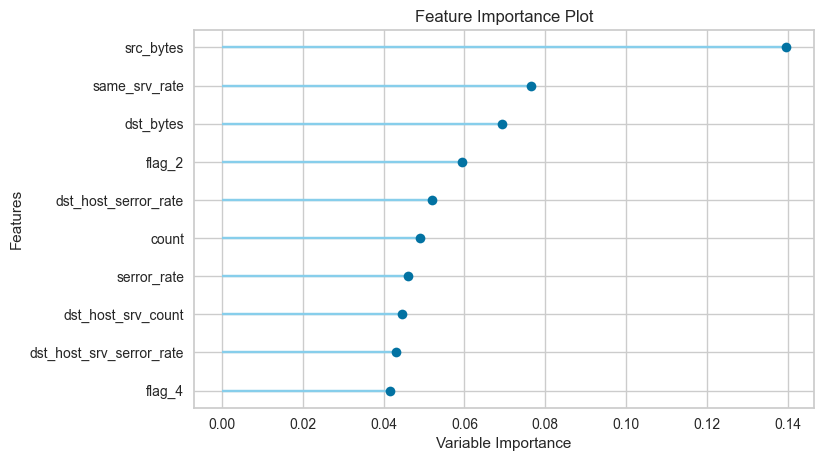

In [26]:
plot_model(rf,plot='feature')

Finalizing a Model will also train the Holdout Set of data thus providing us the efficient result

In [27]:
finalized_rf=finalize_model(rf)

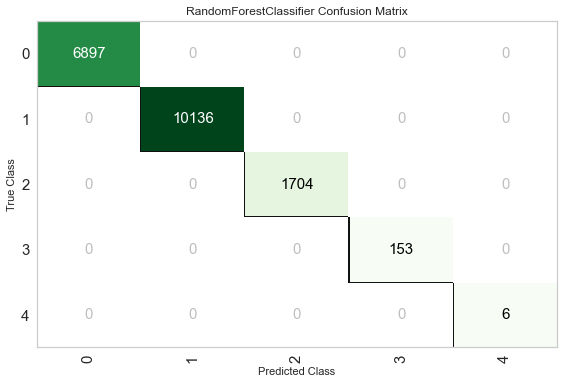

In [28]:
plot_model(finalized_rf,plot='confusion_matrix')

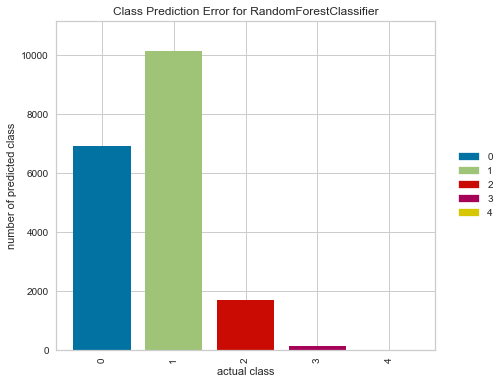

In [29]:
plot_model(finalized_rf,plot='error')

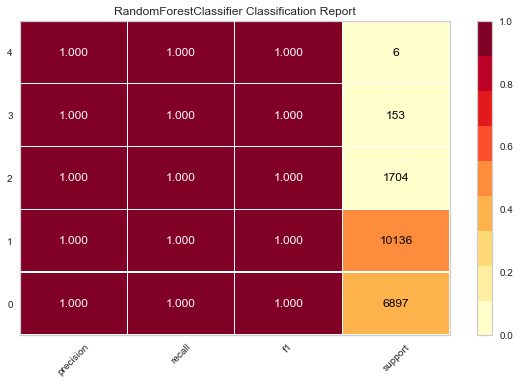

In [30]:
plot_model(finalized_rf,plot='class_report')

In [31]:
save_model(model=finalized_rf,model_name='./model/latest_intrusion_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['protocol_type',
                                                             'service', 'flag'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['duration',
                                                           'src_bytes',
                                                           'dst_bytes', 'land',
                                                           'hot', 'logged_in',
                                                           'num_compromised',
                                                           'su_attempted',
                                                           'num_root',
                                                           'num